In [1]:
import re
import numpy as np

In [2]:
def read_amdis_elu(elu_file_path):

    f = open(elu_file_path).read()

    a = f.split('\n')
    m = []
    n = []
    for i, l in enumerate(a):
        if l.startswith('NAME'):
            m.append(i)
        if l.startswith('NUM PEAKS'):
            n.append(i)

    name_lst = []
    for name_number in m:
        name_lst.append(a[name_number])
    peak_area = []
    R2 = []
    RT = []
    for name_str in name_lst:
        nm0 = name_str.split('|')
        for nm1 in nm0:
            if nm1.startswith('XN'):
                peak_area.append(nm1)
            elif nm1.startswith('FG'):
                R2.append(nm1)
            elif nm1.startswith('RT'):
                RT.append(nm1)

    mss_dense = np.zeros((0, 1000), dtype=np.float32)
    for t in range(len(m)-1):
        ms = []
        for j in range(n[t] + 1, m[t + 1] - 1):
            result = re.findall(r'\((.*?)\)', a[j])
            for k in result:
                ms.append(k)
        mzs = []
        ins = []
        for p in ms:
            mz_in = p.split(',')
            mzs.append(int(float(mz_in[0])))
            mz_in0 = mz_in[1].split(' ')
            ins.append(np.float32((mz_in0[0])))

        ms_dense = np.zeros((1, 1000), dtype=np.float32)
        for i, mz in enumerate(mzs):
            ms_dense[0, mz - 1] = ins[i]
        mss_dense = np.vstack((mss_dense, ms_dense))
    ms = []
    for j in range(n[-1] + 1, len(a)):
        result = re.findall(r'\((.*?)\)', a[j])
        for k in result:
            ms.append(k)
    mzs = []
    ins = []
    for p in ms:
        mz_in = p.split(',')
        mzs.append(int(float(mz_in[0])))
        mz_in0 = mz_in[1].split(' ')
        ins.append(np.float32((mz_in0[0])))

    ms_dense = np.zeros((1, 1000), dtype=np.float32)
    for i, mz in enumerate(mzs):
        ms_dense[0, mz - 1] = ins[i]
    mss_dense = np.vstack((mss_dense, ms_dense))
    return RT, peak_area, R2, mss_dense

The RT is:5.5587min, the peak area is 6311036, the R2 is 1.000


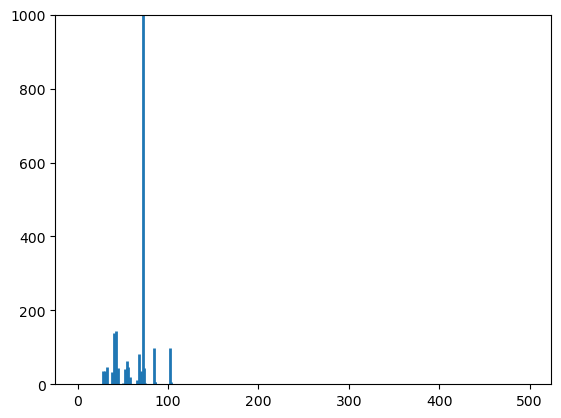

In [4]:
file_path = r'plant essential oil.ELU'
RT, peak_area, R2, mss_dense = read_amdis_elu(file_path)

com_num = input('Please input the number of compounds:')
RT_num = re.sub(r'[A-Za-z]', '', RT[int(com_num)-1])
area_num = re.sub(r'[A-Za-z]', '', peak_area[int(com_num)-1])
R2_num = re.sub(r'[A-Za-z]', '', R2[int(com_num)-1])
print(f'The RT is:{RT_num}min, the peak area is {area_num}, the R2 is {R2_num}')

import matplotlib.pyplot as plt
ms = mss_dense[int(com_num)-1]
plt.vlines(np.arange(0,500), np.zeros((len(np.arange(0,500)),)), ms[0:500], linestyles='solid', linewidth=2)
plt.ylim([0,1000])
plt.show()